# Second assignment: Analyse your "realistic" graph

In [1]:
import networkx as nx
from networkx.algorithms import community
import numpy as np
import matplotlib.pyplot as plt
import collections

In [2]:
G = nx.Graph()
edges = nx.read_edgelist('aa - Copia1.txt')
G.add_edges_from(edges.edges())

C:\Users\canta\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


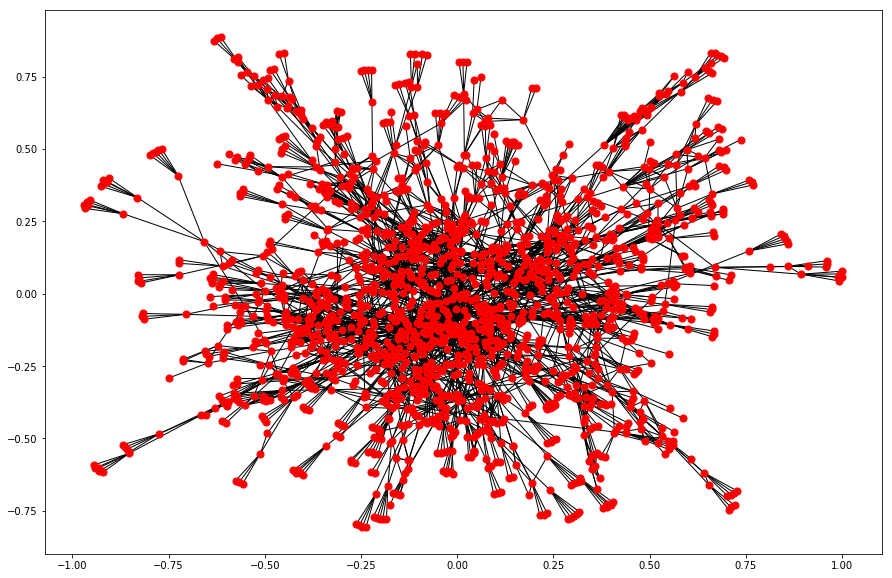

In [3]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G,font_size=0,node_size=50)
#Print node numbers G.number_of_nodes()
#Print edges number G.number_of_edges()

## Measurements

### Degree distribution

Average degree: 4.410974244120941


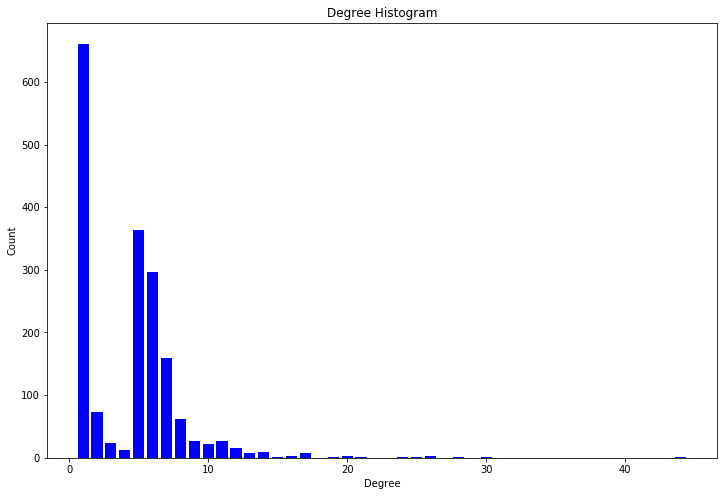

In [14]:
# Degree distribution
degree_sequence = sorted([val for (node, val) in G.degree],reverse=True)

avg_degree = sum(degree_sequence)/len(degree_sequence)
print("Average degree: {}".format(avg_degree))

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

plt.figure(figsize=(12,8))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

In [83]:
#Utils functions

def my_statistics(d):
    
    def my_avg():    
        return sum(v for k,v in d.items())/len(d)

    def my_var():
        return np.var(list(d.values()))

    def my_max():
        return max(list(d.items()), key=lambda item: item[1])

    def my_min():
        return min(list(d.items()), key=lambda item: item[1])

    def my_median():
        return sorted(list(d.items()),key=lambda item: item[1])[len(d)//2]
    
    return my_avg(),my_var(),my_max(),my_min(),my_median()

### Betweenness

In [26]:
btwc = nx.betweenness_centrality(G) # Dictionary of nodes with betweenness centrality as the value.

In [86]:
avgbtwc,varbtwc,(maxn,maxv),(minn,minv),(medn,medv) = my_statistics(btwc)
print(avgbtwc,varbtwc,(maxn,maxv),(minn,minv),(medn,medv))

0.0033542309305425364 0.00011851937379928037 ('8', 0.2855321433346104) ('46', 0.0) ('277', 6.419039228453406e-05)


### Closeness

In [79]:
cln = nx.closeness_centrality(G)

In [88]:
avgcln,varcln,(maxn,maxv),(minn,minv),(medn, medv) = my_statistics(cln)
print(avgcln,varcln,(maxn,maxv),(minn,minv),(medn, medv))

0.14729502731745717 0.0006232454066621044 ('8', 0.24452054794520547) ('2610', 0.09278029003586465) ('720', 0.14446422790547103)


### Clustering

In [112]:
cl = nx.clustering(G)
trs = nx.transitivity(G)
avg_cl = nx.average_clustering(G)
var_cl = my_statistics(cl)[1]
print(trs,avg_cl,var_cl)

0.3089204456300016 0.26712781186592377 0.09919856063256058


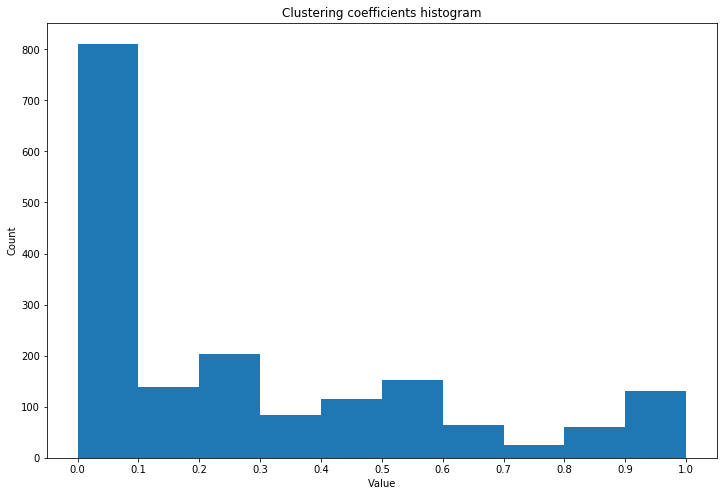

In [110]:
val_clust = sorted([val for (node, val) in cl.items()],reverse=True)
plt.figure(figsize=(12,8))

counts,bins,_ = plt.hist(val_clust,bins=10)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())


'''
plt.hist(deg, 1000, width=0.80, color='b')

ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)'''
plt.title("Clustering coefficients histogram")
plt.ylabel("Count")
plt.xlabel("Value")
plt.xticks(bins)
plt.show()

### Giant component


In [89]:
# identify largest connected component
Gcc = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
G0 = Gcc[0]

if(len(G)==len(G0)):
    print("Largest connected component is the whole graph")



Largest connected component is the whole graph


In [ ]:
degrees = [val for (node, val) in G0.degree]
avg_degree = sum(degrees)/len(degrees)
density = nx.density(G0)
diameter = nx.diameter(G0)
avg_path_lenght = nx.average_shortest_path_length(G0)
avg_clust = nx.average_clustering(G)

print("avg degree: ",avg_degree)
print("density: ",density)
print("diameter: ",diameter)
print("avg_path_lenght: ",avg_path_lenght)
print("avg_clustering coeff: ",avg_clust)

In [113]:
from networkx.algorithms import community

# community based on centrality measure

communities_generator = community.girvan_newman(G)
top_level_communities = next(communities_generator)
next_level_communities = next(communities_generator)

# num of communities
print(len(list(next_level_communities)))

[['0', '1', '10', '100', '1000', '1001', '1002', '1003', '1004', '1005', '1006', '1007', '101', '1019', '102', '1020', '1021', '1022', '1023', '1024', '1025', '1026', '1027', '1028', '1029', '103', '1030', '1031', '1032', '1033', '1034', '1035', '1036', '1037', '1038', '1039', '104', '1040', '1041', '1042', '1043', '1044', '1045', '1046', '1047', '1048', '1049', '105', '1050', '1051', '1052', '1053', '106', '1061', '1062', '1063', '1064', '1065', '1066', '1067', '1068', '1069', '107', '1070', '1071', '1076', '1077', '1078', '1079', '108', '1083', '1089', '109', '1090', '1093', '1097', '11', '110', '111', '112', '1120', '1121', '1122', '1123', '1124', '1125', '1126', '1127', '1128', '1129', '113', '1130', '1131', '1132', '1133', '1134', '1135', '1136', '1137', '1138', '1139', '114', '1140', '1141', '1142', '1143', '1144', '1145', '1146', '1147', '1148', '1149', '115', '1150', '1151', '1152', '1153', '1154', '1155', '1156', '1157', '1158', '1159', '116', '1160', '1161', '1162', '1163', '

In [126]:
from networkx.algorithms.community import greedy_modularity_communities

# community based on modularity
c = list(greedy_modularity_communities(G))
print("Number of communities:",len(c)) # num of communities
# each element of c contains the list of nodes belongs to each communities
for i in range(len(c)):
    print("community",i,"contains",len(c[i]),"nodes")

Number of communities: 49
community 0 contains 270 nodes
community 1 contains 180 nodes
community 2 contains 178 nodes
community 3 contains 177 nodes
community 4 contains 85 nodes
community 5 contains 78 nodes
community 6 contains 64 nodes
community 7 contains 52 nodes
community 8 contains 50 nodes
community 9 contains 45 nodes
community 10 contains 43 nodes
community 11 contains 33 nodes
community 12 contains 33 nodes
community 13 contains 33 nodes
community 14 contains 28 nodes
community 15 contains 28 nodes
community 16 contains 26 nodes
community 17 contains 25 nodes
community 18 contains 24 nodes
community 19 contains 22 nodes
community 20 contains 22 nodes
community 21 contains 22 nodes
community 22 contains 21 nodes
community 23 contains 19 nodes
community 24 contains 17 nodes
community 25 contains 16 nodes
community 26 contains 16 nodes
community 27 contains 16 nodes
community 28 contains 16 nodes
community 29 contains 15 nodes
community 30 contains 15 nodes
community 31 contai

modularity is calculated in this way<br>
Q = $\frac{1}{2m} \sum_{ij} \left( A_{ij} - \frac{k_ik_j}{2m}\right)
            \delta(c_i,c_j)$

In [132]:
from networkx.algorithms.community.quality import modularity

modularity(G,next_level_communities)
#modularity(G,c)

0.1660195810427507

In [147]:
llist = [] # build a list of color for each community
for node in G:
    for i,comm in enumerate(next_level_communities):#enumerate(c)
        if node in comm:
            llist.append(i)
            break    
#print(llist)
vmax = len(np.unique(llist))-1
print(vmax)

2


No handles with labels found to put in legend.


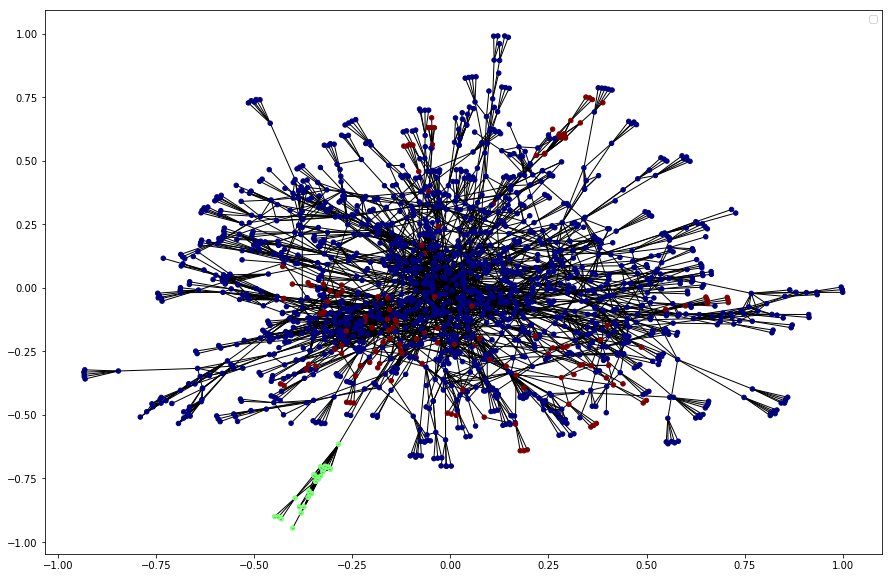

In [150]:
plt.figure(figsize=(15,10))
nx.draw_networkx(G,node_color=llist,cmap = 'jet',vmin = 0,vmax=vmax,font_size=0,node_size=20)
plt.legend()


**Does the graph have the same characteristics of a random or a power-law network?**<br>


Transitivity: 0.3089204456300016
Average degree: 4.410974244120941


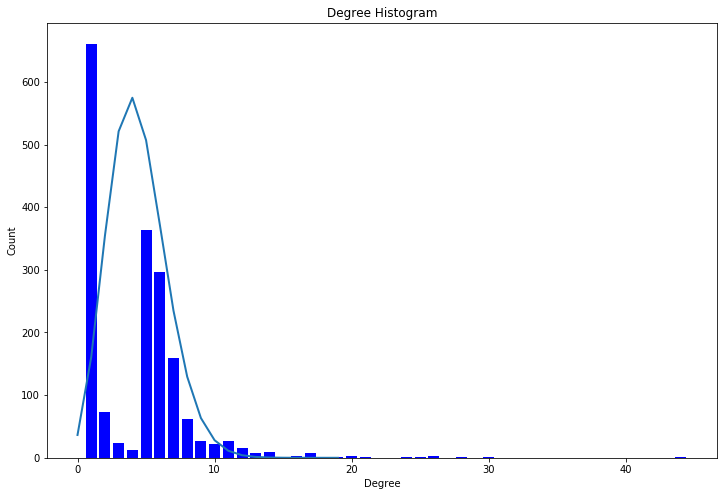

False

In [178]:
#Random

#Transitivity
#Random graph has no transitivity or clustering
print("Transitivity:",trs)

#Poisson
# Degree distribution
degree_sequence = sorted([val for (node, val) in G.degree],reverse=True)

avg_degree = sum(degree_sequence)/len(degree_sequence)
print("Average degree: {}".format(avg_degree))

degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

from scipy.stats import poisson
arr = []

rv = poisson(avg_degree)
for num in range(0,20):
    arr.append(rv.pmf(num)*3000)
    

plt.figure(figsize=(12,8))
plt.bar(deg, cnt, width=0.80, color='b')
plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
plt.plot(arr, linewidth=2.0)
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)
plt.show()

# CONTROLLARE avg_degree > log N if true implies that these networks should be broken into isolated clusters
avg_degree > np.log(len(G))

In [ ]:
# Power-law distribution
# As we seen in the graph below our graph behaves as a power law distribution
# Many nodes with only a few links, few hubs with large number of links

**Which are the most important nodes, with respect to a given centrality measure?**<br>


In [182]:
aux = nx.degree_centrality(G)
a = [key for (key, value) in sorted(aux.items(), key= lambda item: item[1],reverse=True)[:10]]
print(a)

['8', '18', '346', '33', '481', '78', '63', '99', '11', '30']


**Are the paths short with respect to the size of the network?**<br>

In [ ]:
#if this ratio is near 0 it means that the short paths are much smaller than the network size; as opposite 
# if the value is near 1 it means that the short path is similar to the longest minimum path (geodesic path)
avg_path_lenght/diameter

**Is the network dense?**<br>


In [190]:
G.number_of_edges()*2.0/float(G.number_of_nodes()*(G.number_of_nodes()-1))

0.0024711340303198545